In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib as mtl

target_similarity_map = np.linspace(-0.5,0.5,500)
#target_similarity_map =  np.linspace(0,1,500)
visibility_map = np.linspace(0,1,500)
t, d = np.meshgrid(target_similarity_map,visibility_map)
def fmu(d,phi,orac):
    return orac * (d+1/2) + phi * (3/2 - d)
def fmu_sin_orac(d,phi):
    return phi * (d+1/2)
def fmu_sin_orac2(d,phi):
    return phi * d
#def fmu_sin_orac3(d,phi):
#    return phi * d
mu_f = fmu(d, t, 0.5)/2
mu_nf = fmu(d, t, -0.5)/2
#mu_sin_orac = fmu_sin_orac(d, t)/1.5 -0.5
mu_sin_orac = fmu_sin_orac(d, t) /2

In [23]:
mu_f.min(), mu_f.max(), mu_nf.min(), mu_nf.max(), mu_sin_orac.min(), mu_sin_orac.max()

(-0.25, 0.5, -0.5, 0.25, -0.375, 0.375)

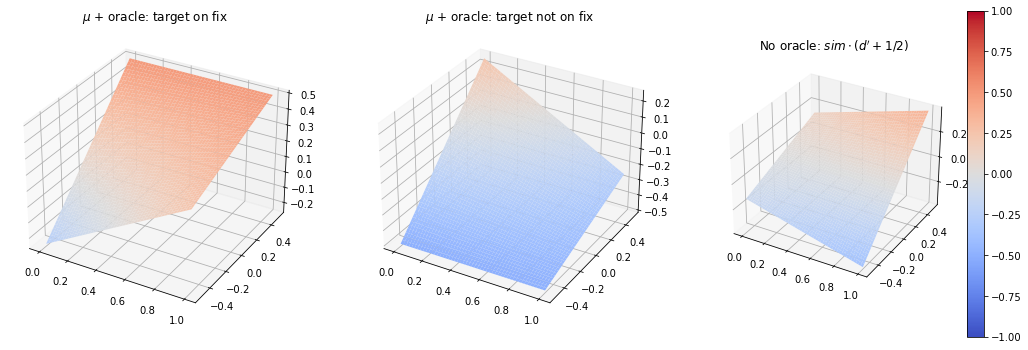

In [24]:
#f = plt.contour(t,d,mu)
#f.colormap()
fig = plt.figure(figsize=(18,6))
colmap = mtl.cm.coolwarm
#norm=colors.CenteredNorm()
axs = []
ax = fig.add_subplot(1,3,1, projection='3d')
axs.append(ax)
ax.set_title('$\mu$ + oracle: target on fix')
p = ax.plot_surface(d,t,mu_f, cmap=colmap, vmin=-1,vmax=1)
ax = fig.add_subplot(1,3,2, projection='3d')
axs.append(ax)
ax.set_title('$\mu$ + oracle: target not on fix')
p = ax.plot_surface(d, t, mu_nf, cmap=colmap, vmin=-1,vmax=1)
ax = fig.add_subplot(1,3,3, projection='3d')
ax.set_title('No oracle: $sim \cdot (d\'+1/2)$')
axs.append(ax)
p = ax.plot_surface(d, t, mu_sin_orac, cmap=colmap, vmin=-1,vmax=1)
#p = ax.plot_surface(d, t, mu_sin_orac, rstride=0.05, cstride=0.05)
#plt.show()
#fig.colorbar((-1,1),location='bottom')
sm = plt.cm.ScalarMappable(cmap=colmap, norm=plt.Normalize(vmin=-1, vmax=1))
fig.colorbar(sm)

In [3]:
mu_f.shape, t.shape

((500, 500), (500, 500))

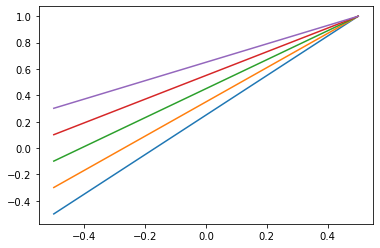

In [9]:
plt.plot(target_similarity_map, mu_f[0:1000:100,:].T)

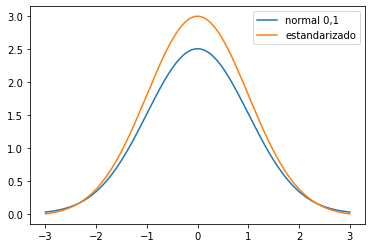

In [28]:
def densidad_gausiana(x, mu=0, sigma=1):
    return np.sqrt(2 * np.pi)*np.exp(-(x - mu)**2 / (2 * sigma**2))
                                     
x = np.linspace(-3,3, 1000)
y = densidad_gausiana(x)
plt.plot(x,y, label='normal 0,1')
t = y - np.min(y)
t = t / np.max(t) *3
plt.plot(x,t, label='estandarizado')
plt.legend()

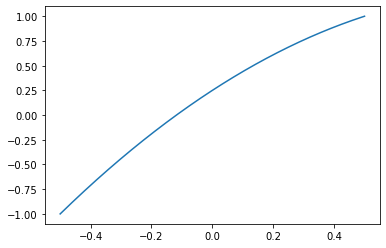

In [27]:
def fmu(d,phi,orac):
    return orac * (d+1/2) + phi * (3/2-d)

x = np.linspace(-0.5,0.5,500)
found = fmu(orac=0.5, d=x, phi=x)
plt.plot(x, found)

In [ ]:
y = 0.5 * (visibility_map + 0.5) + target_similarity_map * (1 - visibility_map + 0.5)